In [1]:
import pandas as pd
import numpy as np
import spacy
import string 
import re
import unicodedata
import string
import re    #for regex

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

2023-08-20 00:21:36.151376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
nltk.download('vader_lexicon')

sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/hari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv("Elon_musk.csv", encoding = 'latin')
stpwrd =  set(open('stop.txt').read().split())
df.head(3)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!


In [5]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [6]:
# df["CleanText"] = df["Text"].apply(lambda x: x.split())
df['CleanText'] = df['Text'].apply(lambda x: re.sub(r'[^\x00-\x7f]',r'', str(x)))
df["CleanText"] = df["CleanText"].apply(lambda x: str(x).lower())
df.head(2)

,Unnamed: 0,Text,CleanText
0,1,@kunalb11 Im an alien,@kunalb11 im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,@id_aa_carmack ray tracing on cyberpunk with h...


In [7]:
df['CleanText'] = df['CleanText'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))
df['CleanText'] = df['CleanText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))
df['CleanText'] = df['CleanText'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

df['CleanText'] = df['CleanText'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
df['CleanText'] = df['CleanText'].apply(lambda x: ' '.join(x.split()))
df['CleanText'] = df['CleanText'].apply(lambda x: remove_accented_chars(x))
df['CleanText'] = df['CleanText'].apply(lambda x: ' '.join([t for t in x.split() if t not in stpwrd]))
df['word_count'] = df['CleanText'].apply(lambda x: len(str(x).split(" ")))

In [8]:
df.CleanText.head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextlevel
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: CleanText, dtype: object

In [9]:
df['token_text'] = df['CleanText'].apply(word_tokenize)
df.head()

,Unnamed: 0,Text,CleanText,word_count,token_text
0,1,@kunalb11 Im an alien,kunalb11 im alien,3,"[kunalb11, im, alien]"
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray tracing cyberpunk hdr nextlevel,6,"[id_aa_carmack, ray, tracing, cyberpunk, hdr, ..."
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,4,"[joerogan, spotify, great, interview]"
3,4,@gtera27 Doge is underestimated,gtera27 doge underestimated,3,"[gtera27, doge, underestimated]"
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,7,"[teslacn, congratulations, tesla, china, amazi..."


In [10]:
df[['word_count']].idxmax()

word_count    681
dtype: int64

In [11]:
df.iloc[681,:]

Unnamed: 0                                                  682
Text          RT @NASA: <U+0001F409> Enter the Crew Dragon. ...
CleanText     nasa u0001f409 enter crew dragon 448 pm est 94...
word_count                                                   19
token_text    [nasa, u0001f409, enter, crew, dragon, 448, pm...
Name: 681, dtype: object

In [12]:
def lemma(text):
    lemma_token = " "
    for word in text:
        lemma = word
        lemma_token = lemma_token + " " + lemma
    return lemma_token

In [13]:
df['Lemma_text'] = df['token_text'].apply(lemma)
df.head()

,Unnamed: 0,Text,CleanText,word_count,token_text,Lemma_text
0,1,@kunalb11 Im an alien,kunalb11 im alien,3,"[kunalb11, im, alien]",kunalb11 im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray tracing cyberpunk hdr nextlevel,6,"[id_aa_carmack, ray, tracing, cyberpunk, hdr, ...",id_aa_carmack ray tracing cyberpunk hdr next...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,4,"[joerogan, spotify, great, interview]",joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera27 doge underestimated,3,"[gtera27, doge, underestimated]",gtera27 doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,7,"[teslacn, congratulations, tesla, china, amazi...",teslacn congratulations tesla china amazing ...


In [14]:
clean_data = df['Lemma_text']

In [15]:
df['textblob_sentiment_polarity'] = df["Lemma_text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [16]:
df['textblob_sentiment_subjectivity'] = df["Lemma_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity )

In [17]:
df.head()

,Unnamed: 0,Text,CleanText,word_count,token_text,Lemma_text,textblob_sentiment_polarity,textblob_sentiment_subjectivity
0,1,@kunalb11 Im an alien,kunalb11 im alien,3,"[kunalb11, im, alien]",kunalb11 im alien,-0.25,0.75
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray tracing cyberpunk hdr nextlevel,6,"[id_aa_carmack, ray, tracing, cyberpunk, hdr, ...",id_aa_carmack ray tracing cyberpunk hdr next...,0.00,0.00
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,4,"[joerogan, spotify, great, interview]",joerogan spotify great interview,0.80,0.75
3,4,@gtera27 Doge is underestimated,gtera27 doge underestimated,3,"[gtera27, doge, underestimated]",gtera27 doge underestimated,0.00,0.00
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,7,"[teslacn, congratulations, tesla, china, amazi...",teslacn congratulations tesla china amazing ...,0.60,0.90


In [18]:
def sentiment_analysis(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [19]:
df['sentiment_textblob'] = df['textblob_sentiment_polarity'].apply(sentiment_analysis)

In [20]:
df[['Text', 'textblob_sentiment_polarity','sentiment_textblob']].head()

,Text,textblob_sentiment_polarity,sentiment_textblob
0,@kunalb11 Im an alien,-0.25,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.00,Neutral
2,@joerogan @Spotify Great interview!,0.80,Positive
3,@gtera27 Doge is underestimated,0.00,Neutral
4,@teslacn Congratulations Tesla China for amazi...,0.60,Positive


In [21]:
df.sentiment_textblob.value_counts()

Neutral     1182
Positive     624
Negative     193
Name: sentiment_textblob, dtype: int64

###### Sentiment analysis using VADER

In [22]:
df["vadar_Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Lemma_text"]]
df["vadar_Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Lemma_text"]]
df["vadar_Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Lemma_text"]]
df["vadar_Compound"] = [sentiments.polarity_scores(i)["compound"] for i in df["Lemma_text"]]

In [23]:
df.head()

,Unnamed: 0,Text,CleanText,word_count,token_text,Lemma_text,textblob_sentiment_polarity,textblob_sentiment_subjectivity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound
0,1,@kunalb11 Im an alien,kunalb11 im alien,3,"[kunalb11, im, alien]",kunalb11 im alien,-0.25,0.75,Negative,0.000,0.000,1.000,0.0000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray tracing cyberpunk hdr nextlevel,6,"[id_aa_carmack, ray, tracing, cyberpunk, hdr, ...",id_aa_carmack ray tracing cyberpunk hdr next...,0.00,0.00,Neutral,0.000,0.000,1.000,0.0000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,4,"[joerogan, spotify, great, interview]",joerogan spotify great interview,0.80,0.75,Positive,0.577,0.000,0.423,0.6249
3,4,@gtera27 Doge is underestimated,gtera27 doge underestimated,3,"[gtera27, doge, underestimated]",gtera27 doge underestimated,0.00,0.00,Neutral,0.000,0.512,0.488,-0.2732
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,7,"[teslacn, congratulations, tesla, china, amazi...",teslacn congratulations tesla china amazing ...,0.60,0.90,Positive,0.606,0.000,0.394,0.8271


In [24]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [25]:
df['sentiments_vadar'] = df['vadar_Compound'].apply(vader_analysis)
df.head()

,Unnamed: 0,Text,CleanText,word_count,token_text,Lemma_text,textblob_sentiment_polarity,textblob_sentiment_subjectivity,sentiment_textblob,vadar_Positive,vadar_Negative,vadar_Neutral,vadar_Compound,sentiments_vadar
0,1,@kunalb11 Im an alien,kunalb11 im alien,3,"[kunalb11, im, alien]",kunalb11 im alien,-0.25,0.75,Negative,0.000,0.000,1.000,0.0000,Neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,id_aa_carmack ray tracing cyberpunk hdr nextlevel,6,"[id_aa_carmack, ray, tracing, cyberpunk, hdr, ...",id_aa_carmack ray tracing cyberpunk hdr next...,0.00,0.00,Neutral,0.000,0.000,1.000,0.0000,Neutral
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,4,"[joerogan, spotify, great, interview]",joerogan spotify great interview,0.80,0.75,Positive,0.577,0.000,0.423,0.6249,Positive
3,4,@gtera27 Doge is underestimated,gtera27 doge underestimated,3,"[gtera27, doge, underestimated]",gtera27 doge underestimated,0.00,0.00,Neutral,0.000,0.512,0.488,-0.2732,Neutral
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,7,"[teslacn, congratulations, tesla, china, amazi...",teslacn congratulations tesla china amazing ...,0.60,0.90,Positive,0.606,0.000,0.394,0.8271,Positive


###### Feature extraction

In [26]:
vectorizer = CountVectorizer()
bow_matrix =vectorizer.fit_transform(df.CleanText)

In [27]:
print(bow_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
bow_matrix.toarray().shape

(1999, 4541)

In [29]:
vectorizer_ngram = CountVectorizer(analyzer='word',ngram_range=(1,2),max_features = 100)
bow_matrix_bigram =vectorizer_ngram.fit_transform(df.CleanText)

In [30]:
print(bow_matrix_bigram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
bow_matrix_bigram.toarray().shape

(1999, 100)

###### Using TFIDF vectorizer

In [32]:
vectorizer_tfidf = TfidfVectorizer()
tf_idf_matrix = vectorizer_tfidf.fit_transform(df.CleanText)
print(tf_idf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
tf_idf_matrix.toarray().shape

(1999, 4541)

In [34]:
vectorizer_n_gram = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features = 100)
tf_idf_matrix_trigram =vectorizer_n_gram.fit_transform(df.CleanText)
print(tf_idf_matrix_trigram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
tf_idf_matrix_trigram.toarray().shape

(1999, 100)

###### Parts of Speech tagging

In [36]:
nlp = spacy.load('en_core_web_sm')

one_block = df.Text[681]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [37]:
for token in doc_block[0:20]:
    print(token, token.pos_)

RT PROPN
@NASA PROPN
: PUNCT
< X
U+0001F409 X
> X
Enter VERB
the DET
Crew PROPN
Dragon PROPN
. PUNCT
At ADP
4:48 NUM
p.m. NOUN
EST PROPN
( PUNCT
9:48 NUM
p.m. NOUN
UTC PROPN
) PUNCT


In [38]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['tour', 'space']


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,enter,1
1,astronauts,1
2,give,1
3,tour,1
4,space,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

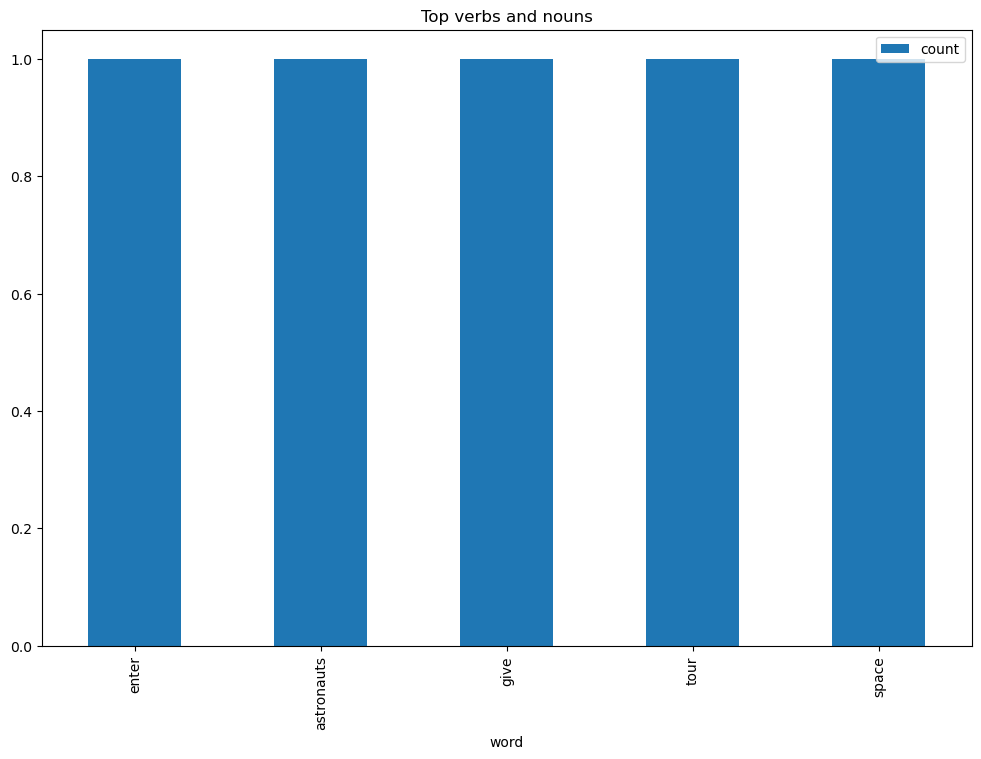

In [40]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

###### Word Cloud

In [41]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

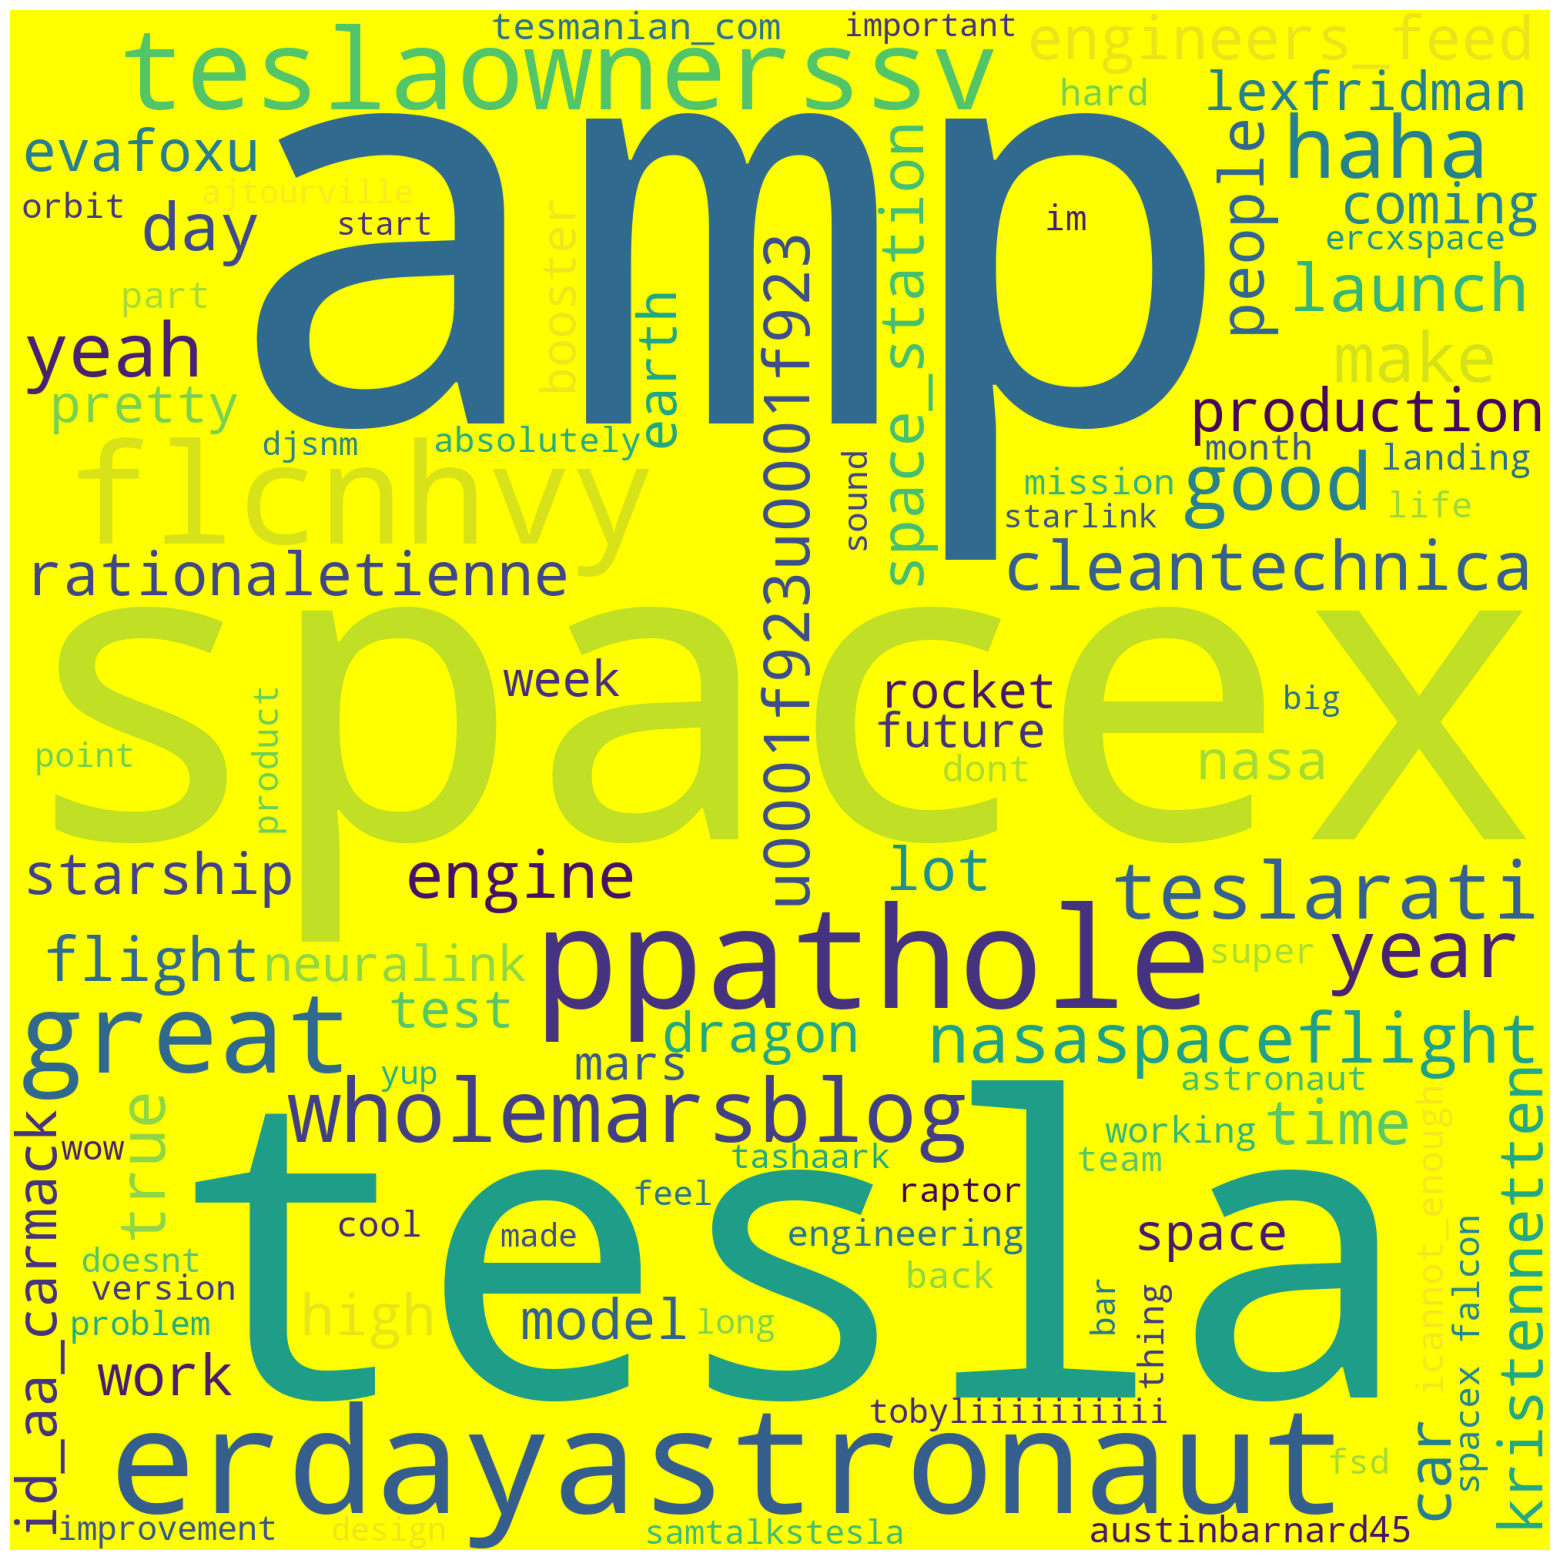

In [42]:
nlp=spacy.load('en_core_web_sm')

lower_words=[Text.lower() for Text in df.CleanText]
doc=nlp(' '.join(lower_words))
stopwords = STOPWORDS
clean_tweets=' '.join(lower_words)
wordcloud = WordCloud(width = 2000, height = 2000, background_color='yellow', max_words=100,stopwords=stopwords).generate(clean_tweets)
# Plot
plot_cloud(wordcloud)